In [1]:
from disaster import config
import numpy as np
import pandas as pd
import joblib

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

timestr = '20200311132737'

In [2]:
# Load model
filename = (
    '{0}_model.joblib'
    .format(timestr)
    )

path = (
    '{0}/{1}'
    .format(
        config.models_path,
        filename
        )
    )
    
clf = joblib.load(path)

In [3]:
# Default based on Global Variable `timestr`
filename_fs = (
    '{0}_feature_selection.txt'
    .format(timestr)
    )

# Load features from file (skip first 2 rows)

path = (
    '{0}/{1}'
    .format(
        config.models_path,
        filename_fs
        )
    )

try:

    best_features = np.loadtxt(
        path,
        delimiter='\n',
        skiprows=2,
        dtype='str'
        )

except OSError:

    raise Exception('''
        Error: try passing a filename as parameter.\n
        Example: $ make metadata PARAMS=\"--filename_fs=\'...\'\"
        ''')

print('\n{0}'.format(best_features))
   
y_true = {}
y_pred = {}
proba = {}
x = {}
    
for s in ['train', 'valid']:
    
    print('\n==> {0}'.format(s.upper()))
    
    # Load data from file

    path = ('{0}/{1}.csv'.format(config.data_path, s))
    
    y_true[s] = pd.read_csv(path, usecols=['id', 'target'])

    y_true[s].set_index('id', inplace=True)

    y_true[s].sort_index(axis=0, inplace=True)

    # Load data from file

    path = ('{0}/{1}_features.csv'.format(config.data_path, s))

    x[s] = pd.read_csv(path)

    x[s].set_index('id', inplace=True)

    x[s].sort_index(axis=0, inplace=True)

    if s != 'train':
        for r in x['train'].columns:

            try:
                x[s][r]

            except KeyError:

                x[s][r] = 0
    
    thr = 0.5
    
    proba[s] = clf.predict_proba(x[s][best_features])[:,1]
    
    y_pred[s] = (proba[s] > thr).astype(int)
    
    print(classification_report(y_true[s], y_pred[s], output_dict=True))


['animalrescue' 'hiroshima' 'jobs' 'none_at' 'none_hash' 'none_url'
 'nowplaying' 't.co' 'usagov' 'yyc' 'feature_sent_score' 'feature_glove_0'
 'feature_glove_1' 'feature_glove_3' 'feature_glove_5' 'feature_glove_8'
 'feature_glove_11' 'feature_glove_12' 'feature_glove_14'
 'feature_glove_15' 'feature_glove_18' 'feature_glove_20'
 'feature_glove_21' 'feature_glove_22' 'feature_glove_25'
 'feature_glove_26' 'feature_glove_28' 'feature_glove_29'
 'feature_glove_30' 'feature_glove_31' 'feature_glove_32'
 'feature_glove_34' 'feature_glove_35' 'feature_glove_39'
 'feature_glove_40' 'feature_glove_41' 'feature_glove_42'
 'feature_glove_44' 'feature_glove_45' 'feature_glove_47'
 'feature_glove_48' 'feature_glove_49' 'feature_glove_50'
 'feature_glove_51' 'feature_glove_52' 'feature_glove_53'
 'feature_glove_54' 'feature_glove_57' 'feature_glove_58'
 'feature_glove_59' 'feature_glove_60' 'feature_glove_61'
 'feature_glove_62' 'feature_glove_63' 'feature_glove_66'
 'feature_glove_67' 'feature_

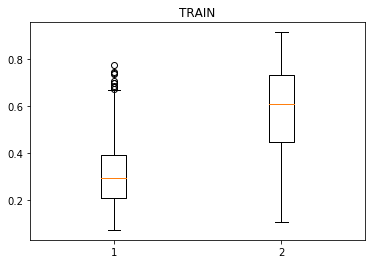

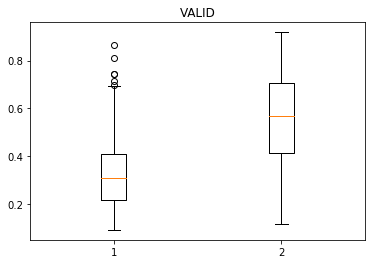

In [4]:
for s in ['train', 'valid']:
    
    fig1, ax = plt.subplots()
    
    ax.set_title(s.upper())
    
    mask_0 = (y_true[s]['target'].values == 0)
    mask_1 = (y_true[s]['target'].values == 1)
    
    proba_0 = pd.Series(proba[s])[mask_0].values
    proba_1 = pd.Series(proba[s])[mask_1].values
    
    ax.boxplot([proba_0, proba_1])

    plt.show()